In [1]:
%pip install torch
%pip install transformers

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision
import transformers

In [3]:
# Load model directly
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment", dtype = torch.float16)
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Device set to use mps:0


In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/SzetoBen/BME-Text-Project/refs/heads/main/data/post-chat-cleaned.csv")
df_json = df.to_json(orient='records')

In [5]:
df.tail()

,Unnamed: 0,Text
56216,56216,"Understanding Generative AI, Its Impacts and L..."
56217,56217,Y ya puedes empezar a crear #arte con @thegeni...
56218,56218,"NVIDIA researchers have developed GANverse3D, ..."
56219,56219,Tech Trend 2022: เทรนด์เทคโนโลยีสำหรับปี 2022 ...
56220,56220,"Hey Google, Siri, Alexa, Bixbi: draw me a pict..."


In [6]:
predictions = [0]

In [7]:
for k in range(0, len(df_json), 500):
    chunk = df_json[k:k+500]
    result = pipe(chunk)
    predictions.append(result)

In [8]:
predictions

[0,
 [{'label': '1 star', 'score': 0.40760931372642517}],
 [{'label': '1 star', 'score': 0.27501770853996277}],
 [{'label': '4 stars', 'score': 0.2967962324619293}],
 [{'label': '3 stars', 'score': 0.3036994934082031}],
 [{'label': '1 star', 'score': 0.46419164538383484}],
 [{'label': '2 stars', 'score': 0.23724909126758575}],
 [{'label': '5 stars', 'score': 0.2526000440120697}],
 [{'label': '1 star', 'score': 0.4569041132926941}],
 [{'label': '1 star', 'score': 0.3728635907173157}],
 [{'label': '2 stars', 'score': 0.29362377524375916}],
 [{'label': '1 star', 'score': 0.428458571434021}],
 [{'label': '1 star', 'score': 0.30220475792884827}],
 [{'label': '1 star', 'score': 0.25956082344055176}],
 [{'label': '1 star', 'score': 0.2864973247051239}],
 [{'label': '4 stars', 'score': 0.305772066116333}],
 [{'label': '2 stars', 'score': 0.445981502532959}],
 [{'label': '5 stars', 'score': 0.2868745028972626}],
 [{'label': '1 star', 'score': 0.22063136100769043}],
 [{'label': '1 star', 'score'

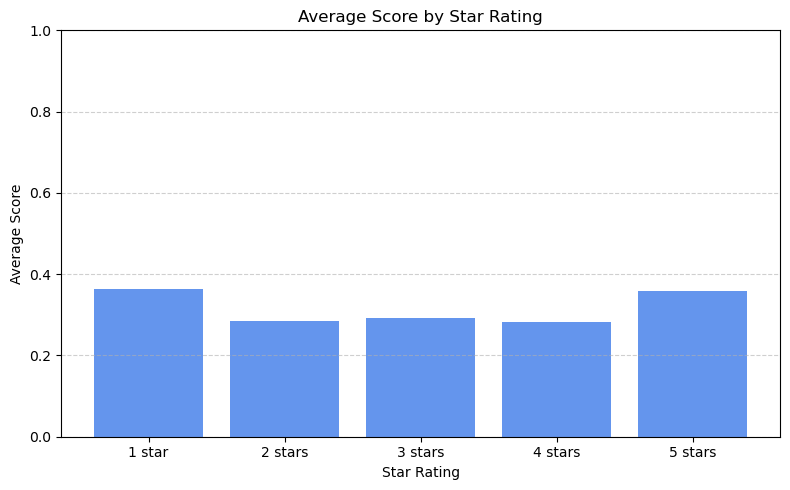

In [72]:
import matplotlib.pyplot as plt

# Flatten the data
#flat_data = [item[0] for item in predictions]
df_flat = pd.DataFrame(predictions)

df_flat = df_flat[1:28856]
str(df_flat)
# Assuming your DataFrame is called df_flat and has a column 'labels'
# Each cell in 'labels' is a list of dictionaries

# Step 1: Flatten the nested data
flattened = []
for row in df_flat.iloc[:,0]:
    for item in row:
        flattened.append(item)

# Step 2: Convert to a new DataFrame
df_plot = pd.DataFrame(flattened)

# Step 3: Group by label and calculate average score
avg_scores = df_plot.groupby('label')['score'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_scores['label'], avg_scores['score'], color='cornflowerblue')
plt.title('Average Score by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [91]:
df_plot

,label,score
0,1 star,0.407609
1,1 star,0.275018
2,4 stars,0.296796
3,3 stars,0.303699
4,1 star,0.464192
...,...,...
28851,4 stars,0.336566
28852,1 star,0.320997
28853,4 stars,0.265493
28854,1 star,0.345953


In [79]:
df2 = pd.read_csv("/Users/edwardzhang/Documents/college/4th year sem 1/Data Science Project/Project 1/cleaned_pre_ai.csv")
df2_json = df2.to_json(orient='records')

In [10]:
predictions2 = [0]

In [80]:
for k in range(0, len(df2_json), 500):
    chunk = df2_json[k:k+500]
    result = pipe(chunk)
    predictions2.append(result)

In [85]:
predictions2=predictions2[28857:]

In [86]:
predictions2

[[{'label': '1 star', 'score': 0.3443989157676697}],
 [{'label': '1 star', 'score': 0.27474716305732727}],
 [{'label': '2 stars', 'score': 0.3041948676109314}],
 [{'label': '2 stars', 'score': 0.2887051999568939}],
 [{'label': '4 stars', 'score': 0.2332097738981247}],
 [{'label': '1 star', 'score': 0.41965150833129883}],
 [{'label': '4 stars', 'score': 0.3154599070549011}],
 [{'label': '5 stars', 'score': 0.3508460521697998}],
 [{'label': '1 star', 'score': 0.3843277394771576}],
 [{'label': '4 stars', 'score': 0.23462653160095215}],
 [{'label': '2 stars', 'score': 0.2450472116470337}],
 [{'label': '5 stars', 'score': 0.308742493391037}],
 [{'label': '1 star', 'score': 0.25497591495513916}],
 [{'label': '1 star', 'score': 0.3917972445487976}],
 [{'label': '1 star', 'score': 0.3657415211200714}],
 [{'label': '1 star', 'score': 0.40172892808914185}],
 [{'label': '1 star', 'score': 0.3443441390991211}],
 [{'label': '1 star', 'score': 0.3859584927558899}],
 [{'label': '1 star', 'score': 0.4

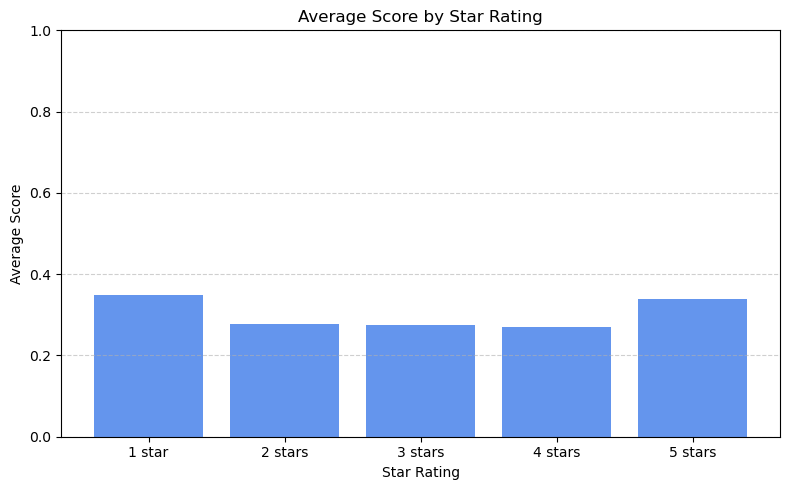

In [93]:
# Flatten the data
#flat_data = [item[0] for item in predictions]
df_flat2 = pd.DataFrame(predictions2)

str(df_flat2)
# Assuming your DataFrame is called df_flat and has a column 'labels'
# Each cell in 'labels' is a list of dictionaries

# Step 1: Flatten the nested data
flattened2 = []
for row in df_flat2.iloc[:,0]:
    for item in row:
        flattened2.append(row)

# Step 2: Convert to a new DataFrame
df_plot2 = pd.DataFrame(flattened2)

# Step 3: Group by label and calculate average score
avg_scores2 = df_plot2.groupby('label')['score'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_scores2['label'], avg_scores2['score'], color='cornflowerblue')
plt.title('Average Score by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [90]:
df_plot2

,0
0,label
1,score
2,label
3,score
4,label
...,...
659553,score
659554,label
659555,score
659556,label
